In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [4]:
df = pd.read_parquet('../data/cleanedData/oxygenAB.parquet')
target = df.pop('oxygenValue')
features = df
x_train, x_test, y_train, y_test = train_test_split(features,target, test_size=0.35)

In [5]:
value = y_train.mean()

In [6]:
pred_train = [value]* len(y_train)
pred_test = [value]* len(y_test)

In [7]:
mean_squared_error(y_train,pred_train)
mean_squared_error(y_test, pred_test)

0.4284773095286942

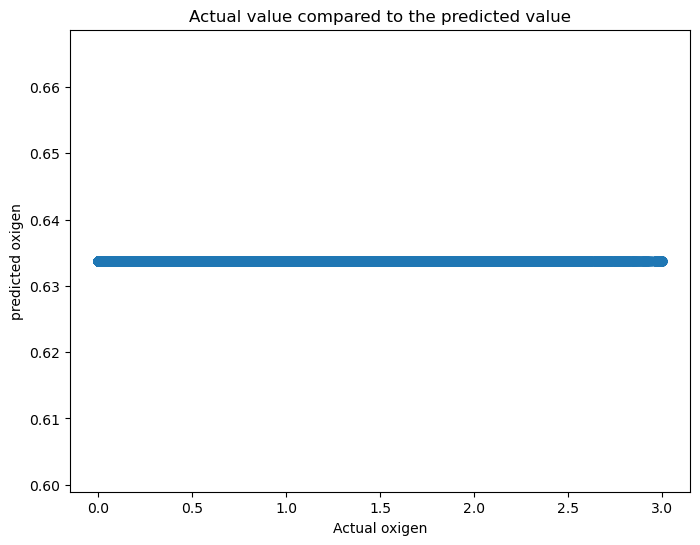

In [8]:
plt.figure(figsize=(8,6))
plt.scatter(y_test,pred_test)
plt.xlabel('Actual oxigen')
plt.ylabel('predicted oxigen')
plt.title('Actual value compared to the predicted value')
plt.show()